<a href="https://colab.research.google.com/github/payamfirouzfar/keras/blob/main/maqale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pwd

/content


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
pwd

'/content'

In [4]:
cd ..

/


In [5]:
pwd

'/'

In [6]:
cd content

/content


In [7]:
ls

IBM.csv  sample_data/


In [8]:
cd sample_data/

/content/sample_data


In [9]:
ls


anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [10]:
cd ..

/content


In [11]:
ls

IBM.csv  sample_data/


In [12]:
df = pd.read_csv("IBM.csv")

In [13]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [14]:
g=pd.DataFrame(df.dtypes )
g.shape

(35, 1)

In [15]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [16]:
df['Attrition'].value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

In [17]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [18]:
df.head()
gf = df
categ = ["BusinessTravel" , "Department" , "EducationField" , "Gender" , "JobRole" , "JobInvolvement" , "JobLevel" , "MaritalStatus", "OverTime" , "RelationshipSatisfaction" ]
neum = gf.drop(columns = categ)
neum = neum.columns
neum = ['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [19]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [20]:
cat=[feature for feature in df.columns if df[feature].nunique()<=20 and df[feature].nunique()>1]
cont=[feature for feature in df.columns if df[feature].nunique()>20 and df[feature].nunique()<1470]

In [21]:
cat

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [22]:
df['Attrition']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

No     1233
Yes     237
Name: Attrition, dtype: int64

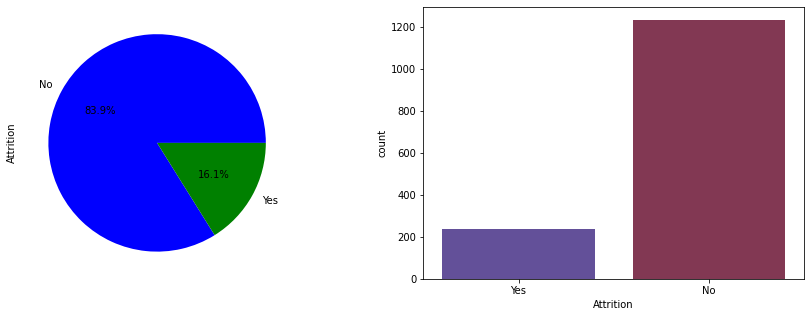

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
color = ["blue" ,"green"  ]
df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%' , colors = color)
plt.subplot(1,2,2)
sns.countplot(df['Attrition']  , palette="twilight")
df['Attrition'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

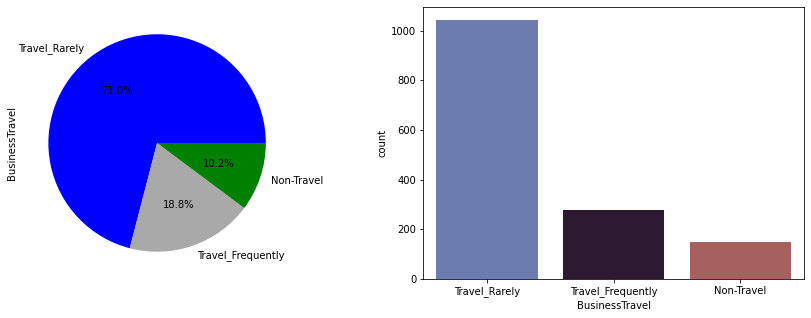

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
color = ["blue" ,"darkgray" , "green" ]
df['BusinessTravel'].value_counts().plot.pie(autopct='%1.1f%%' , colors = color)
plt.subplot(1,2,2)
sns.countplot(df['BusinessTravel'] , palette="twilight")
df['BusinessTravel'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

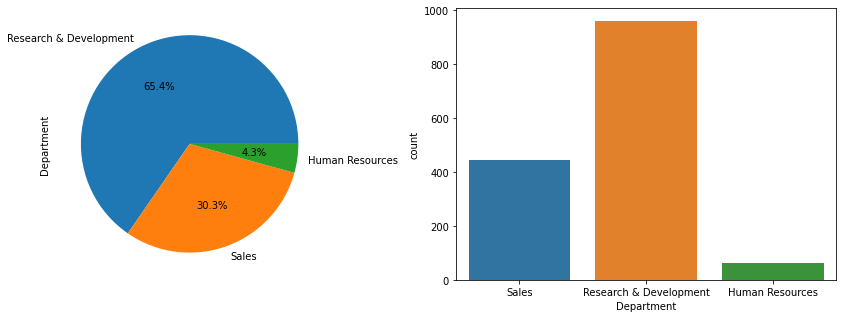

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Department'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Department'])
df['Department'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

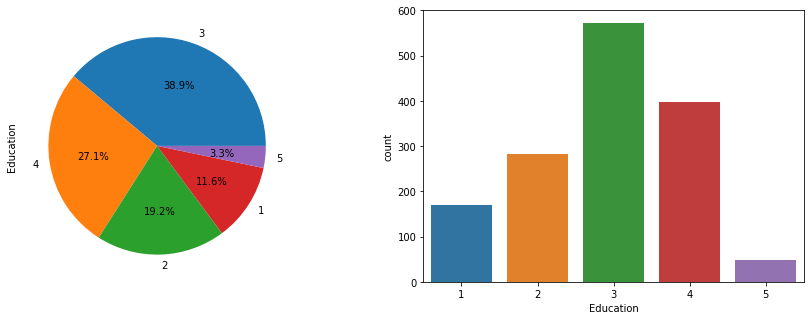

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Education'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Education'])
df['Education'].value_counts()

Maximum 60
Minimum 18


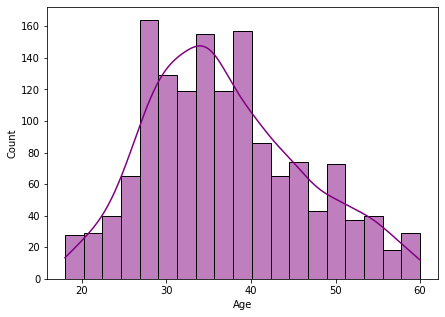

In [27]:
plt.figure(figsize=(7,5))
sns.histplot(df['Age'],kde=True  ,color = "purple")
print('Maximum',df['Age'].max())
print('Minimum',df['Age'].min())

Maximum 40
Minimum 0


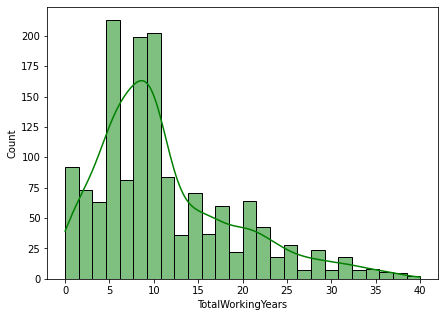

In [28]:
plt.figure(figsize=(7,5))
sns.histplot(df['TotalWorkingYears'],kde=True , color = "green")
print('Maximum',df['TotalWorkingYears'].max())
print('Minimum',df['TotalWorkingYears'].min())

In [29]:
cont

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'TotalWorkingYears',
 'YearsAtCompany']

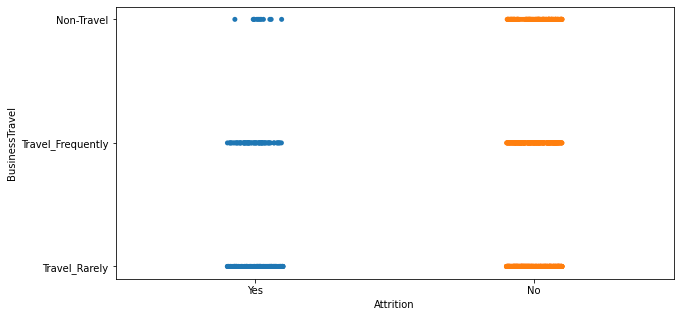

In [30]:
plt.figure(figsize=(10,5))
sns.stripplot(x='Attrition',y='BusinessTravel',data=df , jitter = True )

In [31]:
from ipywidgets import interactive
def jit_wei(jitter = 0.1):
  sns.stripplot(x='Attrition',y='BusinessTravel',data=df , jitter = jitter )

In [32]:
interactive(jit_wei , jitter = (0  ,1, 0.2 ))  #az 0 ta 1 range(0,1,0.2)

interactive(children=(FloatSlider(value=0.1, description='jitter', max=1.0, step=0.2), Output()), _dom_classes…

In [33]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

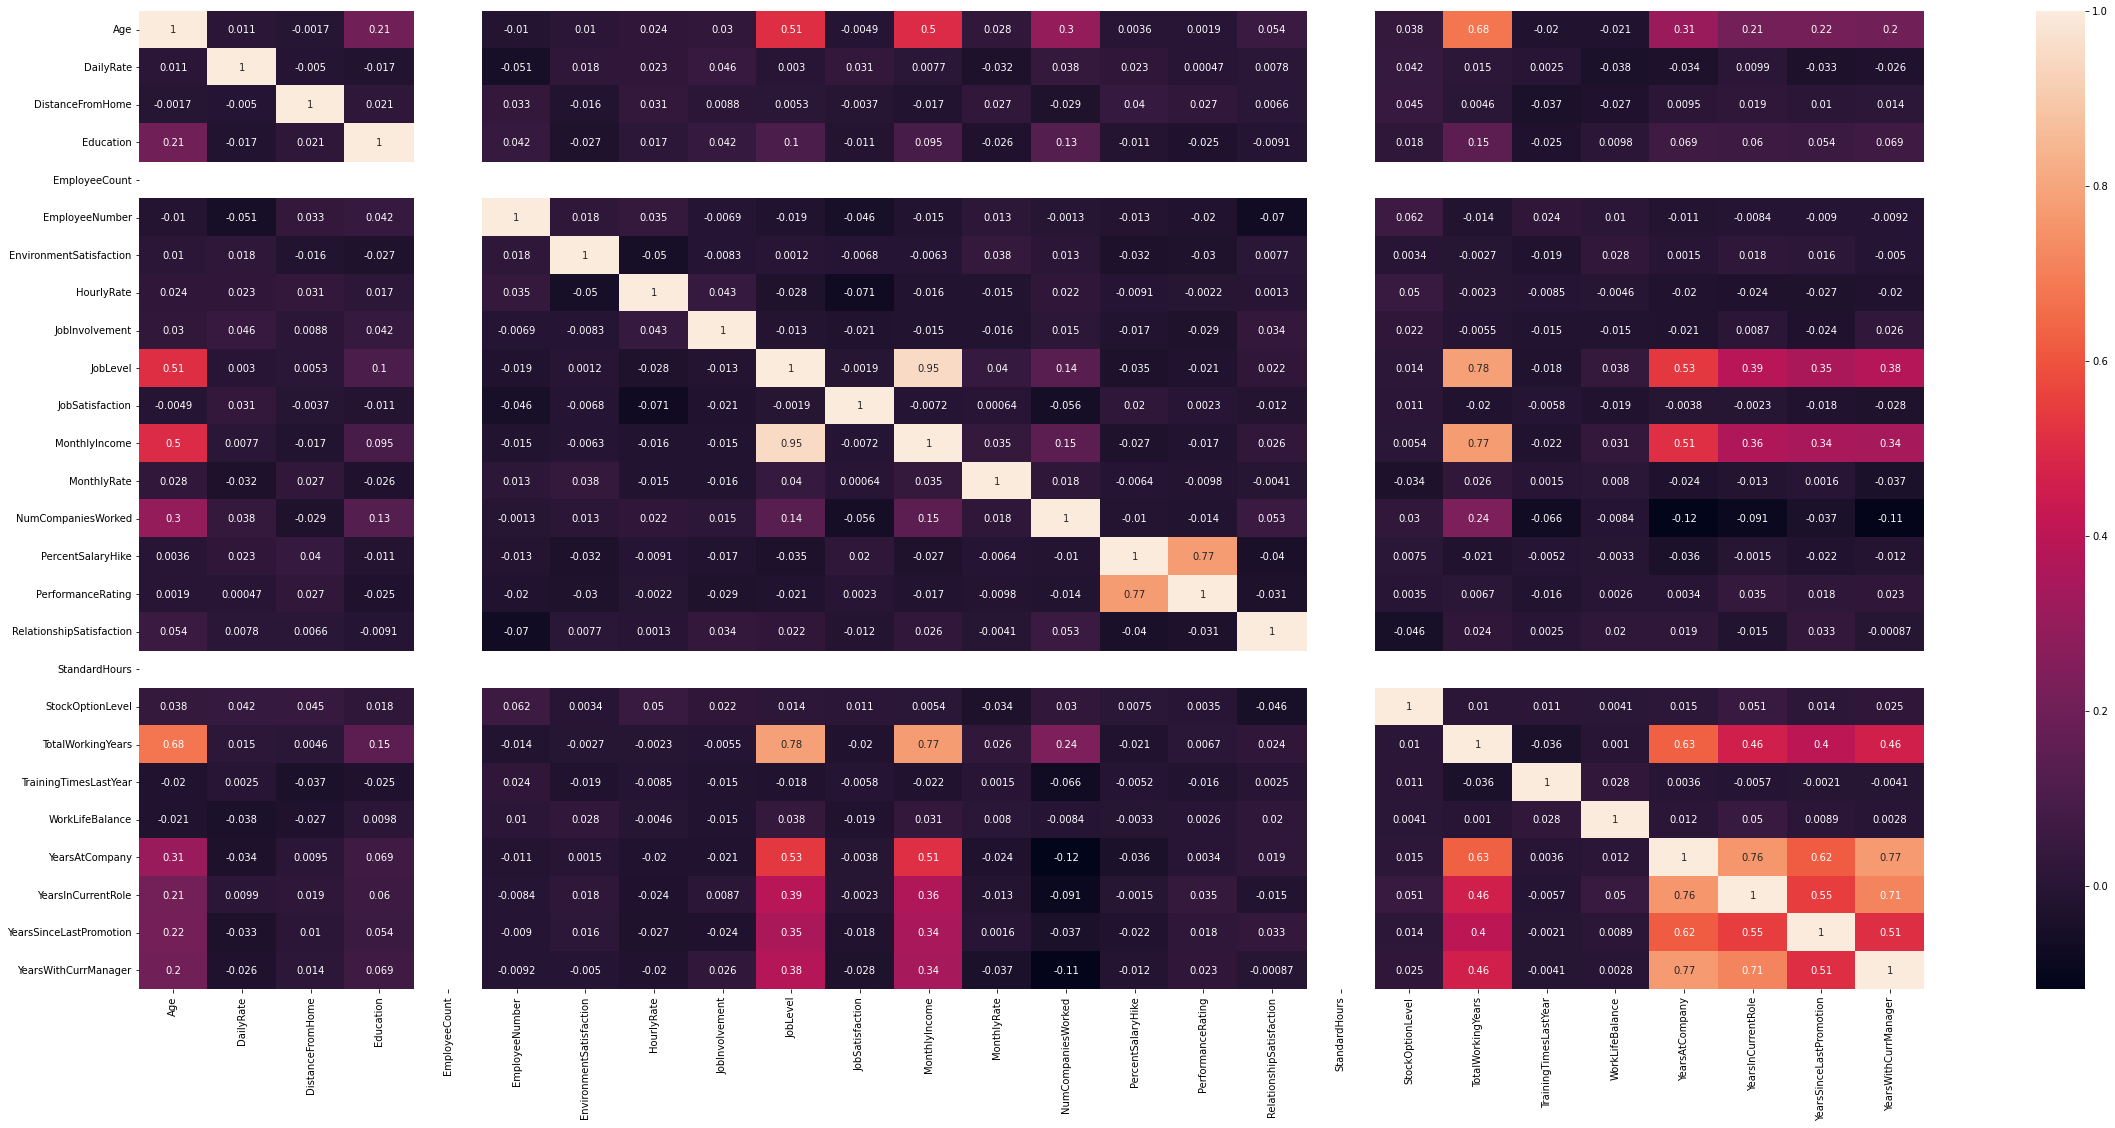

In [34]:
plt.figure(figsize=(40,18))
sns.heatmap(df.corr(),annot=True)

In [35]:
df.drop(['EmployeeNumber','StandardHours','Over18','EmployeeCount'],axis=1,inplace=True)

In [51]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,StandardScaler
o=OrdinalEncoder()
l=LabelEncoder()
one = OneHotEncoder( sparse= False , dtype= int)
s = StandardScaler()

In [37]:
#for i in df.columns:
    #if df[i].dtypes=='O' and i!='Attrition':
        #transformed=one.fit_transform(df[categ])
        #transformed=one.fit_transform(df[i].values.reshape(-1,1))

#Encoding label column with label encoder

##asli
#transformed=one.fit_transform(df[categ])
#df['Attrition']=l.fit_transform(df['Attrition'])

In [38]:
#categoricalchange=pd.DataFrame(transformed , columns= one.get_feature_names(categ),index= df.index)

In [39]:
#.shape


(1470, 41)

In [40]:
#nemeric=pd.DataFrame(s.fit_transform(df[neum]) , columns=neum , index = df.index)

In [41]:
#nemeric

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.254625,-1.224807,1.153254,-0.835451,-0.284329,0.523316,0.489376,-0.426230,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,-0.469754,-0.393938,-1.868426,1.169781,-1.175601,-1.567907,0.741140,1.004010,0.523316,-0.057267,-0.426230,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,-1.605183,-0.640727,0.085049,-0.660531,1.038693,-0.660853,-0.076690,-1.284418,-0.678049,1.309341,2.346151,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,0.546677,-0.887515,0.085049,1.169781,-0.142264,-0.660853,-0.236474,-0.150393,-0.277594,-0.330589,-0.426230,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895


In [44]:
#datakoli  = pd.concat((nemeric , categoricalchange),axis= 1)

In [45]:
#datakoli

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.254625,-1.224807,1.153254,-0.835451,-0.284329,0.523316,0.489376,-0.426230,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0
1466,0.227347,-0.469754,-0.393938,-1.868426,1.169781,-1.175601,-1.567907,0.741140,1.004010,0.523316,-0.057267,-0.426230,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
1467,-1.086676,-1.605183,-0.640727,0.085049,-0.660531,1.038693,-0.660853,-0.076690,-1.284418,-0.678049,1.309341,2.346151,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0
1468,1.322365,0.546677,-0.887515,0.085049,1.169781,-0.142264,-0.660853,-0.236474,-0.150393,-0.277594,-0.330589,-0.426230,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1


In [57]:
from sklearn.model_selection import train_test_split , cross_val_score , cross_validate

In [58]:
df_train , df_test = train_test_split(df , test_size = 0.15)

In [59]:
y = pd.DataFrame(df["Attrition"] , index= df.index)

In [62]:
x_train = df_train.drop(columns=["Attrition"])
y_train = df_train["Attrition"]

x_test = df_test.drop(columns=["Attrition"])
y_test = df_test["Attrition"]


In [65]:
from sklearn.compose import ColumnTransformer
preprossor = ColumnTransformer([("scale" , StandardScaler() , neum),
                                ("ohe" , OneHotEncoder(sparse=False , dtype= int) , categ)
])

In [66]:
xtrans = preprossor.fit_transform(x_train)

In [67]:
new_columns = neum + list(preprossor.named_transformers_["ohe"].get_feature_names(categ))
pd.DataFrame(data=xtrans , columns=new_columns , index =x_train.index )

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4
432,-0.331232,1.236284,-0.886765,1.061588,1.154058,-0.188378,0.239591,-0.801331,-0.827992,0.114429,-0.875319,-0.432738,0.241446,0.344913,0.153991,0.333199,0.000791,-0.346896,0.887567,0.808587,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,1.980608,0.090633,-0.886765,1.061588,-0.671678,1.567839,1.154728,-0.823845,-0.889798,2.116134,1.300891,2.310866,0.241446,0.989432,-0.618439,1.739161,-0.328546,-0.624635,-0.679539,-0.033719,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
505,-1.211933,0.470882,-0.391430,0.087361,0.241190,0.250676,1.154728,-0.824482,0.481415,-0.686253,-0.603293,-0.432738,0.241446,-1.073029,-0.618439,0.333199,-0.657882,-0.624635,-0.679539,-0.595257,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
35,0.659556,1.162688,-0.886765,-0.886867,1.154058,0.299460,0.239591,-0.827455,1.064993,-0.686253,-0.875319,-0.432738,1.405793,-0.686317,0.153991,-1.072764,-0.328546,-0.346896,-0.366118,-0.033719,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
277,0.109118,-1.170319,-0.267596,-0.886867,-1.584546,-1.066486,-1.590682,-0.198768,0.682107,-0.686253,2.388996,2.310866,0.241446,-0.428510,0.153991,0.333199,0.165459,-1.180113,1.514409,0.808587,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,0.329293,-1.153146,-1.010599,1.061588,-0.671678,1.080001,-0.675545,-0.882253,-1.059798,0.114429,1.844944,2.310866,0.241446,-0.557413,0.153991,0.333199,-0.493214,-0.624635,-0.679539,-0.314488,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
733,-1.211933,0.654873,-0.886765,-0.886867,1.154058,-1.651892,1.154728,-0.227016,-1.540226,-0.686253,-0.875319,-0.432738,-0.922901,-0.428510,-0.618439,0.333199,0.165459,0.764060,-0.366118,-0.314488,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.